## Import necessary modules

In [1]:
import WholeBrain.Observables.intrinsicIgnition as ISObservable
from Observables.functional_connectivity import FunctionalConnectivity
from Observables.metastability import Metastability
from Observables.event_based_intrinsic_ignition import EventBasedIntrinsicIgnition
from WholeBrain.Observables.phase_based_intrinsic_ignition import PhaseBasedIntrinsicIgnition
from Filters.bold_band_pass_filter import BOLDBandPassFilter
import matplotlib.pyplot as plt
from subjects import *

Going to use Intrinsic Ignition...


## Setup parameters

In [2]:
data_root_path = "data/TVB_brain_tumor/"
data_subjects_path = data_root_path + "derivatives/TVB/"

## Load subjects

In [3]:
subjects = Subjects()
subjects.initialize(data_subjects_path)

print("************************* Subjects Info *************************")
subjects.pretty_print()
print("*****************************************************************")

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)   
CON01           2100.0          none                           0.0            
CON02           2100.0          none                           0.0            
CON03           2100.0          none                           0.0            
CON04           2100.0          none                           0.0            
CON05           2400.0          none                           0.0            
CON06           2400.0          none                           0.0            
CON07           2400.0          none                           0.0            
CON08           2400.0          none                           0.0            
CON09           2400.0          none                           0.0            
CON10           2400.0          none                           0.0            
CON11           2400.0          none                           0.

## Compute metastability

In [4]:
def compute_preop_metastability_dk68():
    preop_ts_dk68 = subjects.filter_preop_ts_dk68()
    result = dict()
    ms_operator = Metastability()

    for sub_id, ts_dk68 in preop_ts_dk68.items():
        tr = subjects.get_subject_by_id(sub_id).get_fmri_tr()/1000.0
        ms_dk68 = ms_operator.from_fMRI(
            ts_dk68,
            bold_filter=BOLDBandPassFilter(tr=tr, flp=0.007, fhi=0.07, k=2, remove_strong_artifacts=3.0)
        )
        result[sub_id] = ms_dk68
    return result

preop_metastability_dk68 = compute_preop_metastability_dk68()

## Plot metastability Box

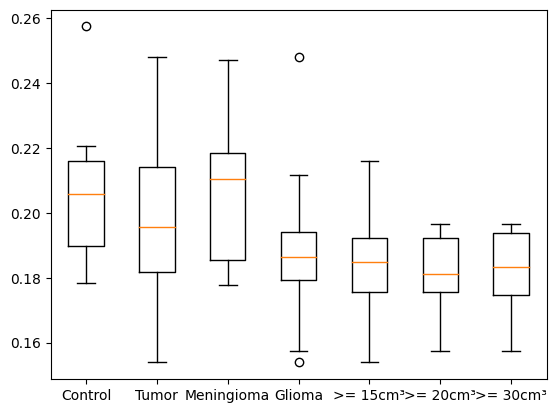

In [5]:
def plot_metastability_box(subjects_ms):
    fig, ax = plt.subplots()

    s_none = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() == 'none')
    s_tumor = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() != 'none')
    s_meningioma = subjects.filter_subjects(lambda sub: 'Meningioma' in sub.get_tumor_type_and_grade())
    s_glioma = subjects.filter_subjects(lambda sub: sub.get_tumor_type_and_grade() != 'none' and 'Meningioma' not in sub.get_tumor_type_and_grade())
    s_plus_15_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 15.0)
    s_plus_20_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 20.0)
    s_plus_30_cm3 = subjects.filter_subjects(lambda sub: sub.get_tumor_size() >= 30.0)

    data_none = {k: v.metastability for k, v in subjects_ms.items() if k in s_none.data}
    data_tumor = {k: v.metastability for k, v in subjects_ms.items() if k in s_tumor.data}
    data_meningioma = {k: v.metastability for k, v in subjects_ms.items() if k in s_meningioma.data}
    data_glioma = {k: v.metastability for k, v in subjects_ms.items() if k in s_glioma.data}
    data_plus_15_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_15_cm3.data}
    data_plus_20_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_20_cm3.data}
    data_plus_30_cm3 = {k: v.metastability for k, v in subjects_ms.items() if k in s_plus_30_cm3.data}

    # Convert data to nparray
    split_data = {
        'Control':  np.array(list(data_none.values())),
        'Tumor': np.array(list(data_tumor.values())),
        'Meningioma': np.array(list(data_meningioma.values())),
        'Glioma': np.array(list(data_glioma.values())),
        '>= 15cm³': np.array(list(data_plus_15_cm3.values())),
        '>= 20cm³': np.array(list(data_plus_20_cm3.values())),
        '>= 30cm³': np.array(list(data_plus_30_cm3.values()))
    }
    plt.boxplot(split_data.values(), labels=split_data.keys())

    plt.show()

plot_metastability_box(preop_metastability_dk68)